# ***An Exploratory Analysis of Rat Sightings In NYCs 5 Boroughs:***

 Creation of sets for further EDA
Preliminary: *Are the reports of rats equally distributed throughout the boroughs?*

>> Does one borough have more reports of rats per population than the other?
where are the most reports by year, month....

>>

Is there a correlation between the frequency of DSNY collection and the affect on the number of sightings?

Types of collections and the reported sightings.

sightings to frequency
sightings to population



Possible Further exploration into:

>Sightings to vendor

Litter baskets.

>Refuge stats compared to US

>Employment stats and truck violations.


#Reported Sightings
---Original data sourced from:

 https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe


> *additional sources added upon completion of ReadMe.txt master repository creation*


###Initial files joined/cleaned with Tableau Prep

==> step1_ratsightings = (Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv
Rat_Sightings.csv)


==> dsny_frequency = (DSNY_Districts, DSNY_Frequencies, NYC_Community_Board_dist,Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv)






Neighborhoods to zips

* Bronx Central Bronx 10453, 10457, 10460
* Bronx Park and Fordham 10458, 10467, 10468
* High Bridge and Morrisania 10451, 10452, 10456
* Hunts Point and Mott Haven 10454, 10455, 10459, 10474
* Kingsbridge and Riverdale 10463, 10471
* Northeast Bronx 10466, 10469, 10470, 10475
* Brooklyn Central Brooklyn 11212, 11213, 11216, 11233, 11238
* Southwest Brooklyn 11209, 11214, 11228
* Borough Park 11204, 11218, 11219, 11230
* Canarsie and Flatlands 11234, 11236, 11239
* Southern Brooklyn 11223, 11224, 11229, 11235
* Northwest Brooklyn 11201, 11205, 11215, 11217, 11231
* Flatbush 11203, 11210, 11225, 11226
* East New York and New Lots 11207, 11208
* Greenpoint 11211, 11222
* Sunset Park 11220, 11232
* Bushwick and Williamsburg 11206, 11221, 11237
* Manhattan Central Harlem 10026, 10027, 10030, 10037, 10039
* Chelsea and Clinton 10001, 10011, 10018, 10019, 10020, 10036
* East Harlem 10029, 10035
* Gramercy Park and Murray Hill 10010, 10016, 10017, 10022
* Greenwich Village and Soho 10012, 10013, 10014
* Lower Manhattan 10004, 10005, 10006, 10007, 10038, 10280
* Lower East Side 10002, 10003, 10009
* Upper East Side 10021, 10028, 10044, 10065, 10075, 10128
* Upper West Side 10023, 10024, 10025
* Inwood and Washington Heights 10031, 10032, 10033, 10034, 10040
* Queens Northeast Queens 11361, 11362, 11363, 11364
* North Queens 11354, 11355, 11356, 11357, 11358, 11359, 11360
* Central Queens 11365, 11366, 11367
* Jamaica 11412, 11423, 11432, 11433, 11434, 11435, 11436
* Northwest Queens 11101, 11102, 11103, 11104, 11105, 11106
* West Central Queens 11374, 11375, 11379, 11385
* Rockaways 11691, 11692, 11693, 11694, 11695, 11697
* Southeast Queens 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
* Southwest Queens 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
* West Queens 11368, 11369, 11370, 11372, 11373, 11377, 11378
* Staten Island Port Richmond 10302, 10303, 10310
* South Shore 10306, 10307, 10308, 10309, 10312
* Stapleton and St. George 10301, 10304, 10305
* Mid-Island 10314

#Import

In [275]:

import os
import requests
import glob
import pandas as pd
!pip install geopandas
import geopandas as gpd
import numpy as np
import re # flexable way to search for matching text in strings Regular Expressions
import seaborn as sns # plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#import geopy #ploting by location longitude and latitude
from math import pi
#from geopy.geocoders import Nominatim as nm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
#these populated on their own
from zmq.constants import THREAD_NAME_PREFIX
from pandas.core.groupby import groupby

#additional imports from notbook reference
import plotly as ply
import plotly.express as px
import plotly.io as pio
import scipy as sc
import sympy as sy
import matplotlib as matplot
import statistics as stat
### some imports are yet to be used...cleaning up and still exploring past analysis usage.

In [276]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
# Read the csv(s)

missing_values=['nan','-', '']
rats = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/step1_ratsightings.csv', na_values = missing_values)
dsny = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/dsny_frequency.csv', na_values = missing_values)
#Unique Key as Index (after import check for duplicates then index unique key after sort of key and created date.)
#drop false leaves the index columns in when reindexing

#EDA DSNY

In [278]:
print('Info:', dsny.info())
print('top 5 rows:', dsny.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_code            606 non-null    int64  
 1   modzcta              606 non-null    int64  
 2   label                606 non-null    object 
 3   zcta                 606 non-null    object 
 4   district             606 non-null    object 
 5   districtcode         606 non-null    int64  
 6   section              606 non-null    object 
 7   community_board      606 non-null    object 
 8   council_district     606 non-null    int64  
 9   schedulecode         606 non-null    object 
 10  neighborhoods        606 non-null    object 
 11  nta                  606 non-null    object 
 12  cb_office_address    606 non-null    object 
 13  pop_est              606 non-null    int64  
 14  frequency            606 non-null    object 
 15  bulk_day1            606 non-null    obj

In [279]:
print('Rows, Columns:', dsny.shape)

Rows, Columns: (606, 34)


##Cleaning DSNY

In [280]:
dsny1 = dsny.drop_duplicates()
dsny1.shape == dsny.shape #(80475, 24)  (80481, 24)

True

In [281]:
dsny1.sort_values(by=['schedulecode','modzcta', 'post_code']).head(5)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
390,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
392,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
284,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
227,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
560,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}


In [282]:
dsny1_sorted = pd.DataFrame(dsny1.sort_values(by=['schedulecode','modzcta', 'post_code'], ascending=True))

In [283]:
dsny1_sorted.reset_index(drop=True)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
1,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
2,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
3,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
4,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,10309,10309,10309,10309,SI03,503,SI037,Community Board 3,51,5037D,...,"Tue, Fri",606,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
602,10309,10309,10309,10309,SI03,503,SI037,Community Board 3,51,5037E,...,"Wed, Sat",607,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
603,10309,10309,10309,10309,SI03,503,SI038,Community Board 3,51,5038C,...,"Mon, Thu",608,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}
604,10309,10309,10309,10309,SI03,503,SI038,Community Board 3,51,5038D,...,"Tue, Fri",609,0.005915,0.575665,40.541857,-74.206175,POINT (-74.206175 40.541857),MULTIPOLYGON (((-74.20072777399997 40.57933312...,20801,{39F3B701-E1E4-4D24-9E7A-D12AF02CD8DF}


In [284]:
# check missing values in different columns via heatmap
# sns.heatmap(dsny1.isnull(), cbar=False)

In [285]:
#dsny1.dropna()
#dropping columns
# dsny1 = dsny1.drop([ 'FID', 'FID-1', 'STATEPLANE_LABELX', 'STATEPLANE_LABELY', 'STATEPLANE_SNAPPEDX',
#        'STATEPLANE_SNAPPEDY', 'GlobalID'], axis=1)


In [286]:
dsny1.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID'],
      dtype='object')

In [287]:
dsny1.head()

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,11385,11385,11385,11385,QW05,405,QW051,Community Board 5,30,4051E,...,Wed,412,0.002083,0.223740,40.700875,-73.893734,POINT (-73.893734 40.700875),MULTIPOLYGON (((-73.88770340399998 40.73429958...,577,{498F4BE7-A870-4D7D-AAA4-22F88AC15FE6}
1,11232,11232,11232,11232,BKS07,307,BKS073,Community Board 7,38,3073D,...,"Tue, Fri",227,0.001030,0.287433,40.650316,-74.008166,POINT (-74.008166 40.650316),MULTIPOLYGON (((-73.98017304799998 40.66116290...,82,{AB947263-8808-4F66-942F-985F5BF265E9}
2,11209,11209,11209,"11209, 11425",BKS10,310,BKS102,Community Board 10,43,3102E,...,Wed,249,0.001101,0.140901,40.624842,-74.024525,POINT (-74.024525 40.624842),MULTIPOLYGON (((-74.03231229499994 40.64404745...,138,{6CBE9191-CF75-4470-A89E-DEAE0936AB58}
3,11357,11357,11357,"11351, 11357",QE07,407,QE072,Community Board 7,19,4072C,...,Thu,434,0.003254,0.442474,40.770483,-73.835639,POINT (-73.835639 40.770483),MULTIPOLYGON (((-73.83972970299999 40.76515397...,907,{600D03CD-21FC-40BB-8ED4-0AAC26E90B98}
4,11219,11219,11219,11219,BKS12,312,BKS122,Community Board 12,44,3122D,...,"Tue, Fri",278,0.000984,0.165920,40.629302,-73.998083,POINT (-73.998083 40.629302),MULTIPOLYGON (((-73.97139775099998 40.64826603...,192,{7D89729A-7373-401E-853A-5044EBEA8556}


In [288]:
dsny1['Location Point'] = dsny1['Location Point'].str.replace('POINT', '')

In [289]:
dsny.bulk_day1.unique()

array(['Wed', 'Tue', 'Thu', 'Unspecified', 'Mon', 'Fri', 'Sat'],
      dtype=object)

#EDA RATS

In [290]:
print('Info:', rats.info())
print('top 5 rows:', rats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

In [291]:
print('Rows, Columns:', rats.shape)
#80481, 25 without Unique Key as Index Rows, Columns: (208789, 28 ratsightings...no change in names or dropped collumns

Rows, Columns: (210120, 29)


Replacing the double checks(null)s

In [292]:
rats.index.is_unique

True

In [293]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [294]:
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [295]:
#check min max report dates
min_date = min(rats['created_date'])
max_date = max(rats['created_date'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  1/1/2010 11:20:45 AM  -  9/9/2022 9:59:51 AM


In [296]:
# #check min max report dates
# min_date = min(rats['closed_date'])
# max_date = max(rats['closed_date'])
# print('Date range: ', min_date, ' - ', max_date)

cant get index to stay... or is it me? reindex keeping this column that is sorted?

In [297]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

the dates still shows as objects.

In [298]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [299]:
#checking the index again no sort going up to reindex nesscisary?
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [300]:
rats['incident_zip'].nlargest(n=15)

19435     11697
25640     11697
48480     11697
135054    11697
75003     11695
1312      11694
1485      11694
2118      11694
2267      11694
3920      11694
3956      11694
4757      11694
6754      11694
9910      11694
10003     11694
Name: incident_zip, dtype: int64

##Cleaning Rats

In [301]:
rats.sort_values(by=['incident_zip']).head(5)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
141379,29057903,10/12/2014 12:00:00 AM,11/11/2014 03:29:43 PM,10/15/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK SOUTH,...,218237.0,40.765684,-73.976235,"(40.765684114893894, -73.9762353119456)",sightings,NaN,NaN,NaN,NaN,NaN
12385,34335842,9/16/2016 12:00:00 AM,10/16/2016 12:57:17 PM,10/18/2016 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,LENOX AVENUE,...,229819.0,40.797466,-73.951700,"(40.7974659648698, -73.95170030179558)",sightings,NaN,NaN,NaN,NaN,NaN
133704,37791806,11/27/2017 12:00:00 AM,12/27/2017 06:10:34 PM,12/1/2017 12:00:00 AM,Other (Explain Below),MANHATTAN,83,10 MANHATTAN,CENTRAL PARK,110 LENOX AVENUE,...,229858.0,40.797573,-73.951570,"(40.79757295469069, -73.95157020157765)",sightings,NaN,NaN,NaN,NaN,NaN
32772,40031244,8/17/2018 12:00:00 AM,09/16/2018 12:13:48 AM,8/23/2018 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,221368.0,40.774278,-73.977370,"(40.77427812337319, -73.9773695445951)",sightings,NaN,NaN,NaN,NaN,NaN
140972,28881497,9/15/2014 12:00:00 AM,10/15/2014 05:12:53 PM,10/8/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,223262.0,40.779476,-73.973573,"(40.7794758468835, -73.97357287287964)",sightings,NaN,NaN,NaN,NaN,NaN


In [302]:
rats_sorted = rats.sort_values(by=['created_date'], ascending=True)

In [303]:
rats_sorted.reset_index(drop=True)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
1,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
2,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
3,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
4,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,55348031,9/9/2022 9:38:01 PM,NaN,9/9/2022 9:38:01 PM,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,204305.0,40.727447,-74.002630,"(40.72744669308238, -74.00263018635036)",sightings,10012.0,10012,10012,23411.0,MULTIPOLYGON (((-74.00408405811187 40.72537431...
210116,55351913,9/9/2022 9:39:20 PM,NaN,9/9/2022 9:39:20 PM,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,231932.0,40.803268,-73.958115,"(40.80326808253412, -73.9581147002217)",sightings,10026.0,10026,10026,39363.0,MULTIPOLYGON (((-73.96200720826798 40.80550908...
210117,55348032,9/9/2022 9:45:11 AM,NaN,9/9/2022 9:45:11 AM,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,217724.0,40.764278,-73.992094,"(40.764278242124526, -73.99209424765353)",sightings,10019.0,multiple,"10019, 10020, 10103, 10111, 10112",43703.0,MULTIPOLYGON (((-74.00114791977168 40.76202777...
210118,55346704,9/9/2022 9:50:04 AM,NaN,9/9/2022 9:50:04 AM,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,204076.0,40.726817,-73.985337,"(40.7268172403236, -73.98533748091528)",sightings,10009.0,10009,10009,57925.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...


In [304]:
print('Borough Value counts after dropping columns and nulls:/n',rats_sorted['borough'].value_counts())

Borough Value counts after dropping columns and nulls:/n BROOKLYN         76566
MANHATTAN        54747
BRONX            39461
QUEENS           31107
STATEN ISLAND     8237
Name: borough, dtype: int64


In [305]:
# Percentage by lambda and DataFrame.apply() method.
#  rat13 =   rat1.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))

In [306]:
rats_sorted.loc[~rats_sorted.index.duplicated(), :].head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
173104,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
38908,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
172919,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
61527,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
175959,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...


### Dropping duplicates/ columns/ nulls

In [307]:
rat1 = rats_sorted.drop_duplicates()
rat1.shape == rats_sorted.shape

True

In [308]:
rat1 = pd.DataFrame(rat1.sort_values(['created_date','unique_key'], ascending=True))

In [309]:

#dropping columns that are unneeded or too many null values
# rat1 = rat1.drop(['cities_acceptable_irs', 'irs_estimated_population', 'landmark', 'marg_error'], axis=1)
# check missing values in different columns via heatmap
# sns.heatmap(rat1.isnull(), cbar=False)

In [310]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom'],
      dtype='object')

####Dropping final nulls for analysis

In [311]:
rat1.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

Will go back and adapt as needed... for each analysis / population counts will need to be addressed also.

In [312]:
# # drop duplicate data (== gives the boolean value)
# rat2 = rat1.drop_duplicates()
# rat2.shape == rat1.shape

###pd.datetime/ created YQMWD

In [313]:
#Converting the date column to its specified data type
rat1['created_date'] = pd.to_datetime(rat1['created_date'])
rat1['closed_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce')

In [314]:
# Creating 4 new columns for easy querying
rat1['year']= rat1.created_date.dt.year
rat1['quarter']= rat1.created_date.dt.quarter
rat1['month'] = rat1.created_date.dt.month
rat1['weekday'] = rat1.created_date.dt.weekday
rat1['day'] = rat1.created_date.dt.day
rat1['hour'] = rat1.created_date.dt.hour
rat1.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,label,zcta,pop_est,the_geom,year,quarter,month,weekday,day,hour
173104,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...,2010,1,1,4,1,11
38908,15634275,2010-01-01 23:46:51,01/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...,2010,1,1,4,1,23
172919,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...,2010,1,1,4,1,12
61527,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...,2010,1,1,4,1,12
175959,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...,2010,1,1,4,1,14


### replacing values in incident_adresses, street_name

In [315]:
# Check if values in 'street_name' column are unique
is_unique = rat1['street_name'].is_unique
print("Are the values in 'street_name' column unique? ", is_unique)

# Get value counts of each unique value in 'street_name' column
street_name_counts = rat1['street_name'].value_counts()
print("Value counts of 'street_name' column:")
print(street_name_counts)

Are the values in 'street_name' column unique?  False
Value counts of 'street_name' column:
BROADWAY              1779
EASTERN PARKWAY       1209
GRAND CONCOURSE       1158
BEDFORD AVENUE         919
LAFAYETTE AVENUE       866
                      ... 
ROYAL OAK ROAD           1
WEST SECOND STREET       1
KINGHORN STREET          1
SPRINGFIELD LANE         1
SANDERS PLACE            1
Name: street_name, Length: 8203, dtype: int64


In [316]:
# #when visualizing i noticed west had a double space and n, s, w, e was used along with north, south, east and west
# street_west_counts = rat1[rat1['street_name'].fillna('').str.contains('west', case=False)]['street_name'].value_counts()
# print(street_west_counts)

In [317]:
#dictionary
replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    'DR MARTIN L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR M L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN L KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN LUTHER KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['street_name'] = rat1['street_name'].replace(replacements, regex=True)

In [318]:
# rat1['street_name'].unique()

In [319]:
#dictionary
incident_address_replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    r'\bDR MARTIN L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR M L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN L KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN LUTHER KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['incident_address'] = rat1['incident_address'].replace(incident_address_replacements, regex=True)

In [320]:
# # double check if values are unique
# is_unique = rat1['incident_address'].is_unique
# print("Are the values in 'incident_address' column unique? ", is_unique)

# # Get value counts of each unique value
# value_counts = rat1['incident_address'].value_counts()
# print("Value counts of 'incident_address' column:")
# print(value_counts)

In [321]:
#Remove extra spaces
rat1['incident_address'] = rat1['incident_address'].apply(lambda x: "".join([x[i] for i in range(len(x)) if i == 0 or (x[i] != " " or x[i-1] != " ")]))

In [322]:
address_counts = rat1['incident_address'].fillna('').value_counts()
print(address_counts)

2131 WALLACE AVENUE     317
95 EASTERN PARKWAY      256
651 BROOKLYN AVENUE     177
410 EASTERN PARKWAY     150
2486 DAVIDSON AVENUE    138
                       ... 
157 EAST 99 STREET        1
22 CRITTENDEN PLACE       1
29 ABERDEEN STREET        1
399 BLEEKER STREET        1
725 TENTH AVENUE          1
Name: incident_address, Length: 96866, dtype: int64


#VALUES

####DATE RANGE:

In [544]:
#check min max crash dates
min_date = min(rat1['created_date'])
max_date = max(rat1['created_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  2010-01-01 08:29:58  -  2023-07-03 02:05:32


In [545]:
#check min max crash dates
min_date = min(rat1['closed_date'])
max_date = max(rat1['closed_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  NaT  -  NaT


####Top ADDRESS_ZIP incidents  all

In [546]:
# Convert "incident_zip" to string type
rat1['incident_zips'] = rat1['incident_zip'].astype(str)

# Create a new column combining "incident_address" and "incident_zip"
rat1['address_zip'] = rat1['incident_address'] + ', ' + rat1['incident_zips']


In [547]:
# Top addresses ZIP codes by created date
top_addresses_by_created_date = rat1.groupby(['created_date'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by year
top_addresses_by_year = rat1.groupby(['year'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by quarter
top_addresses_by_quarter = rat1.groupby(['quarter'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by month
top_addresses_by_month = rat1.groupby(['month'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by weekday
top_addresses_by_weekday = rat1.groupby(['weekday'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by day of the week
top_addresses_by_day_of_week = rat1.groupby(['day'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by hour
top_addresses_by_hour = rat1.groupby(['hour'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Display the results
print("Top addresses ZIP code by created date:")
print(top_addresses_by_created_date)
print()

print("Top addresses ZIP code by year:")
print(top_addresses_by_year)
print()

print("Top addresses ZIP code by quarter:")
print(top_addresses_by_quarter)
print()

print("Top addresses ZIP code by month:")
print(top_addresses_by_month)
print()

print("Top addresses ZIP code by weekday:")
print(top_addresses_by_weekday)
print()

print("Top addresses ZIP code by day of the week:")
print(top_addresses_by_day_of_week)
print()

print("Top addresses ZIP code by hour:")
print(top_addresses_by_hour)
print()

Top addresses ZIP code by created date:
created_date                                       
2010-01-01 08:29:58  202 PULASKI STREET, 11206         1
2010-01-01 11:20:45  59-13 159 STREET, 11365           1
2010-01-01 12:11:51  317 WEST 120 STREET, 10027        1
2010-01-01 12:12:04  2356 LORILLARD PLACE, 10458       1
2010-01-01 14:15:27  900 CONEY ISLAND AVENUE, 11218    1
                                                      ..
2023-07-02 23:04:44  134 MONTAGUE STREET, 11201        1
2023-07-02 23:27:12  34-20 32 STREET, 11106            1
2023-07-03 00:19:54  3 WEST 137 STREET, 10037          1
2023-07-03 01:08:50  PARK ROW, 10038                   1
2023-07-03 02:05:32  EAST 73 STREET, 10021             1
Name: address_zip, Length: 116542, dtype: int64

Top addresses ZIP code by year:
year                                  
2010  600 WEST 196 STREET, 10040          28
      EAST 93 STREET, 10128               23
      2980 WEST 28 STREET, 11224          18
      2970 WEST 27 STREET,

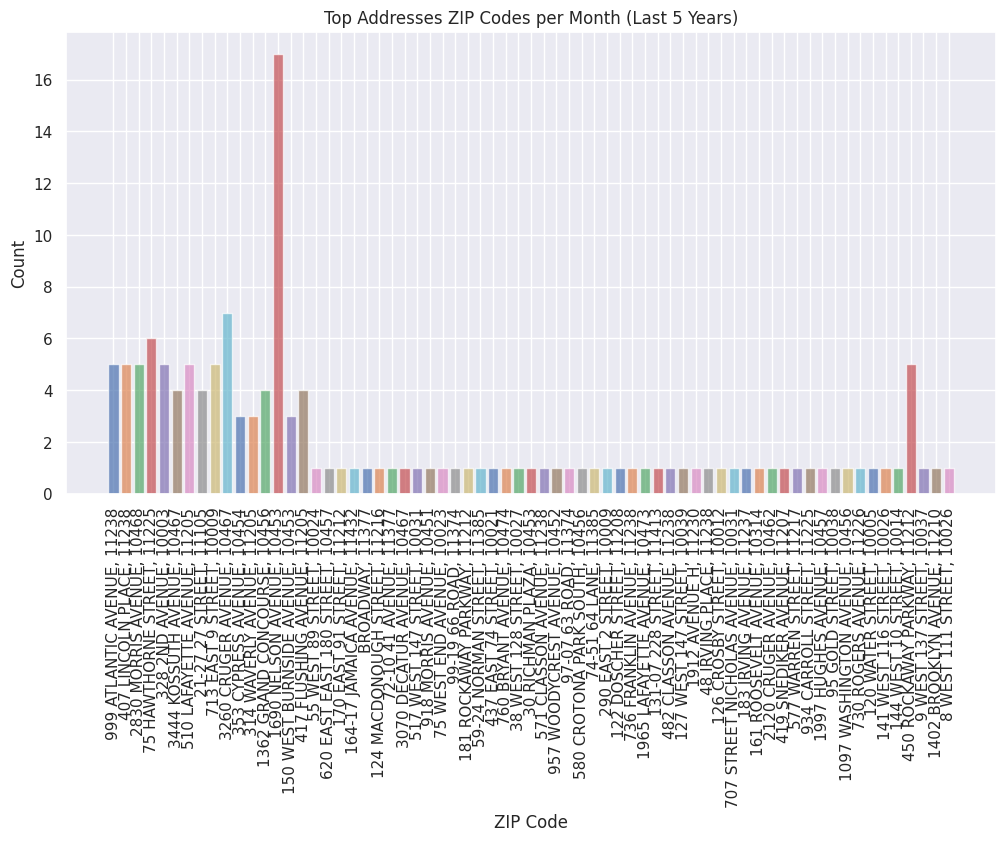

In [548]:
# Convert the series to a DataFrame
df_top_addresses = pd.DataFrame(top_addresses_by_created_date)

# Reset the index of the DataFrame
df_top_addresses.reset_index(inplace=True)

# Rename the columns
df_top_addresses.columns = ['created_date', 'address_zip', 'count']

# Convert the 'created_date' column to a period type representing month and year
df_top_addresses['created_date'] = pd.to_datetime(df_top_addresses['created_date'])
df_top_addresses['month_year'] = df_top_addresses['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year = pd.to_datetime('today').year
five_years_ago = current_year - 5
df_top_addresses = df_top_addresses[df_top_addresses['created_date'].dt.year >= five_years_ago]

# Get the top 3 ZIP codes per month
top_3_per_month = df_top_addresses.groupby('month_year').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

# Create a figure and axes with a wider plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
top_3_per_month.groupby('month_year').apply(lambda x: plt.bar(x['address_zip'], x['count'], alpha=0.7))

# Set the labels and title
ax.set_xlabel('ZIP Code')
ax.set_ylabel('Count')
ax.set_title('Top Addresses ZIP Codes per Month (Last 5 Years)')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
# Convert the series to a DataFrame
normalized_top_addresses = pd.DataFrame(top_addresses_by_created_date)

# Reset the index of the DataFrame
normalized_top_addresses.reset_index(inplace=True)

# Rename the columns
normalized_top_addresses.columns = ['created_date', 'address_zip', 'count']

# Convert the 'created_date' column to a period type representing month and year
normalized_top_addresses['created_date'] = pd.to_datetime(normalized_top_addresses['created_date'])
normalized_top_addresses['month_year'] = normalized_top_addresses['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year = pd.to_datetime('today').year
five_years_ago = current_year - 5
normalized_top_addresses = normalized_top_addresses[normalized_top_addresses['created_date'].dt.year >= five_years_ago]

# Calculate the sightings per capita
normalized_top_addresses['sightings_per_capita'] = normalized_top_addresses['count'] / population_column  # Replace 'population_column' with the actual column representing population

# Get the top 3 ZIP codes per month
top_3_per_month = normalized_top_addresses.groupby('month_year').apply(lambda x: x.nlargest(1, 'sightings_per_capita')).reset_index(drop=True)

# Create a figure and axes with a wider plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
top_3_per_month.groupby('month_year').apply(lambda x: plt.bar(x['address_zip'], x['sightings_per_capita'], alpha=0.7))

# Set the labels and title
ax.set_xlabel('ZIP Code')
ax.set_ylabel('Sightings per Capita')
ax.set_title('Top Addresses ZIP Codes per Month (Last 5 Years) - Normalized')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '(2022, 41-49 150 STREET, 11355)'),
  Text(0.0, 0, '(2010, 600 WEST 196 STREET, 10040)'),
  Text(10.0, 0, '(2012, 46-01 67 STREET, 11377)'),
  Text(20.0, 0, '(2014, 2131 WALLACE AVENUE, 10462)'),
  Text(30.0, 0, '(2016, 95 EASTERN PARKWAY, 11238)'),
  Text(40.0, 0, '(2018, 410 EASTERN PARKWAY, 11225)'),
  Text(50.0, 0, '(2020, 76 STREET NICHOLAS PLACE, 10032)'),
  Text(60.0, 0, '(2022, 41-49 150 STREET, 11355)'),
  Text(70.0, 0, ''),
  Text(80.0, 0, '')])

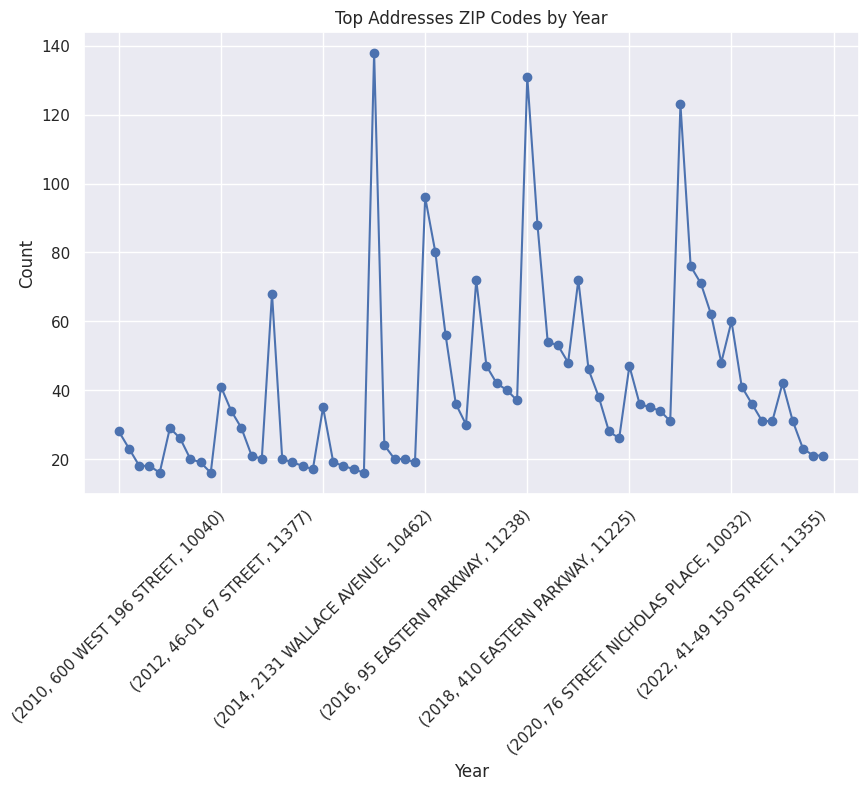

In [549]:
plt.figure(figsize=(10, 6))
top_addresses_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top Addresses ZIP Codes by Year')
plt.xticks(rotation=45)

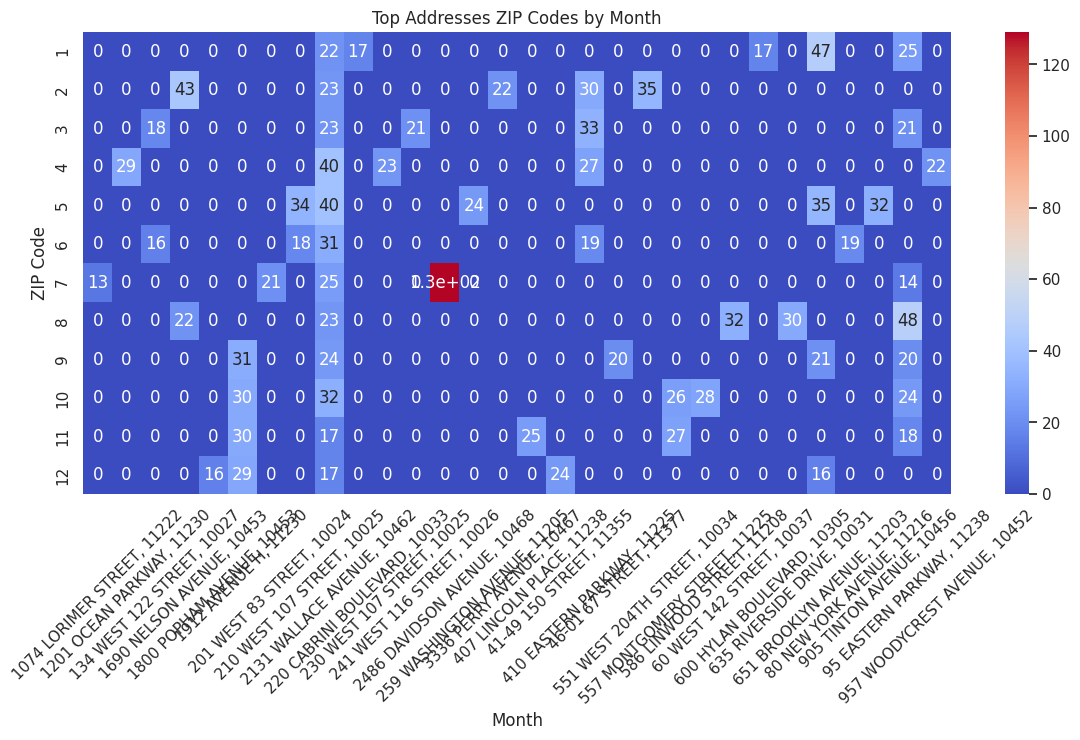

In [550]:
plt.figure(figsize=(14, 6))
sns.heatmap(top_addresses_by_month.unstack().fillna(0), cmap='coolwarm', annot=True)
plt.xlabel('Month')
plt.ylabel('ZIP Code')
plt.title('Top Addresses ZIP Codes by Month')
plt.xticks(rotation=45)
plt.show()

####Top Community Board

#####Top Community board by created date

In [551]:
# Top  Community Boards by Created Date'
top_community_board_counts = rat1.groupby(['created_date', 'community_board']).size().reset_index(name='cb_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_community_board_sorted = top_community_board_counts.sort_values(by=['created_date', 'cb_count'], ascending=[False, False])

print("Top Addresses by Sightings Created Date:")
print(top_community_board_sorted)

Top Addresses by Sightings Created Date:
              created_date        community_board  cb_count
167724 2023-07-03 02:05:32  Unspecified MANHATTAN         1
167723 2023-07-03 01:08:50           01 MANHATTAN         1
167722 2023-07-03 00:19:54           10 MANHATTAN         1
167721 2023-07-02 23:27:12              01 QUEENS         1
167720 2023-07-02 23:04:44            02 BROOKLYN         1
...                    ...                    ...       ...
4      2010-01-01 14:15:27            12 BROOKLYN         1
3      2010-01-01 12:12:04               06 BRONX         1
2      2010-01-01 12:11:51           10 MANHATTAN         1
1      2010-01-01 11:20:45              07 QUEENS         1
0      2010-01-01 08:29:58            03 BROOKLYN         1

[167725 rows x 3 columns]


In [552]:
# Filter the 'cd_count' values that are >= 5
top_cb_greaterthan5 = top_community_board_sorted[top_community_board_sorted['cb_count'] >= 5]

print("Top Addresses by Sightings Created Date (Counts >= 5):")
print(top_cb_greaterthan5)

Top Addresses by Sightings Created Date (Counts >= 5):
              created_date        community_board  cb_count
160712 2023-04-03 11:40:47            17 BROOKLYN         5
74621  2019-04-16 00:00:00            09 BROOKLYN         5
74627  2019-04-16 00:00:00      Unspecified BRONX         5
74542  2019-04-14 00:00:00   Unspecified BROOKLYN         9
74516  2019-04-13 00:00:00  Unspecified MANHATTAN         5
...                    ...                    ...       ...
4511   2010-07-08 00:00:00           08 MANHATTAN         8
4523   2010-07-08 00:00:00   Unspecified BROOKLYN         6
4494   2010-07-07 00:00:00   Unspecified BROOKLYN        11
4466   2010-07-06 00:00:00   Unspecified BROOKLYN         5
4405   2010-07-02 00:00:00      Unspecified BRONX         5

[2176 rows x 3 columns]


In [553]:
# Filter the data for cb_count >= 5
df_filtered_counts = top_community_board_sorted[top_community_board_sorted['cb_count'] >= 5]

# Get the unique cb_count values along with the community_board column
filtered_counts = df_filtered_counts[['community_board', 'cb_count']].drop_duplicates()

print("Top Community Boards by Sightings Created Date (Counts >= 5):")
print(filtered_counts)

# Convert the 'created_date' column to a period type representing month and year
top_community_board_sorted['created_date'] = pd.to_datetime(top_community_board_sorted['created_date'])
top_community_board_sorted['month_year'] = top_community_board_sorted['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year_cb = pd.to_datetime('today').year
five_years_ago_cb = current_year_cb - 5
top_community_board_sorted_filtered = top_community_board_sorted[top_community_board_sorted['created_date'].dt.year >= five_years_ago_cb]

# Filter the data for cb_count >= 5
df_filtered_counts_filtered = top_community_board_sorted_filtered[top_community_board_sorted_filtered['cb_count'] >= 5]

# Get the unique cb_count values along with the community_board column
filtered_counts_filtered = df_filtered_counts_filtered[['community_board', 'cb_count']].drop_duplicates()

print("Top Community Boards by Sightings Created Date (Counts >= 5, Last 5 Years):")
print(filtered_counts_filtered)

Top Community Boards by Sightings Created Date (Counts >= 5):
              community_board  cb_count
160712            17 BROOKLYN         5
74621             09 BROOKLYN         5
74627       Unspecified BRONX         5
74542    Unspecified BROOKLYN         9
74516   Unspecified MANHATTAN         5
...                       ...       ...
9977         03 STATEN ISLAND         6
8660              11 BROOKLYN         5
5625             08 MANHATTAN         7
5383                02 QUEENS         5
4511             08 MANHATTAN         8

[209 rows x 2 columns]
Top Community Boards by Sightings Created Date (Counts >= 5, Last 5 Years):
              community_board  cb_count
160712            17 BROOKLYN         5
74621             09 BROOKLYN         5
74627       Unspecified BRONX         5
74542    Unspecified BROOKLYN         9
74516   Unspecified MANHATTAN         5
...                       ...       ...
63763                07 BRONX         5
63316               03 QUEENS         

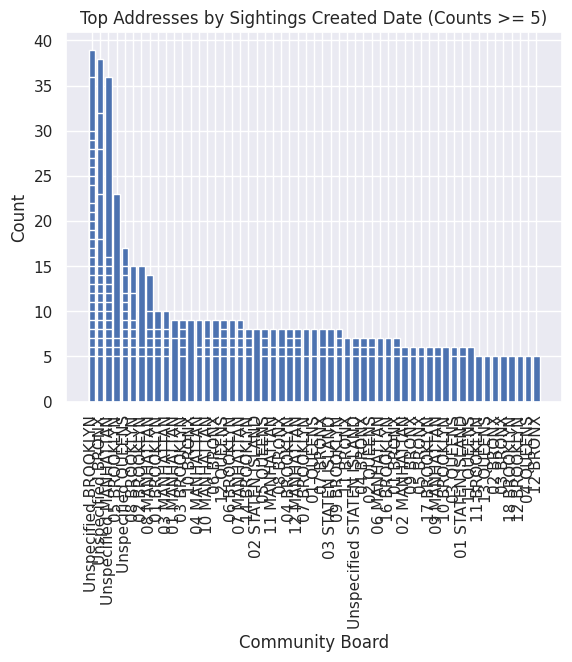

In [554]:
# Sort the data by 'cb_count' in descending order
filtered_counts_sorted = filtered_counts.sort_values('cb_count', ascending=False)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data as a bar chart
ax.bar(filtered_counts_sorted['community_board'], filtered_counts_sorted['cb_count'])

# Set the labels and title
ax.set_xlabel('Community Board')
ax.set_ylabel('Count')
ax.set_title('Top Addresses by Sightings Created Date (Counts >= 5)')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

#####Top Community board YQMweekday

In [555]:

# # Top Community Boards by year','quarter','month','weekday'
# top_cb_yqmw = rat1.groupby(['year','quarter','month','weekday', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

# print("Top Community Boards by year','quarter','month','weekday':")
# print(top_cb_yqmw)
# print()

#####Top Community board YQM

In [556]:

# # Top  Community Boards by year','quarter','month'
# top_cb_yqm = rat1.groupby(['year','quarter','month', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

# print("Top  Community Boards by year...:")
# print(top_cb_yqm)
# print()

#####Top Community board YQ

In [557]:

# Top  Community Boards by year','quarter'
top_cb_yq_counts = rat1.groupby(['year','quarter', 'community_board']).size().reset_index(name='yq_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_cb_yq_sorted = top_cb_yq_counts.sort_values(by=['year','quarter', 'yq_count'], ascending=[True,True, False])

print("Top  Community Boards by year and quarter:")
print(top_cb_yq_sorted)

Top  Community Boards by year and quarter:
      year  quarter       community_board  yq_count
29    2010        1          07 MANHATTAN        87
37    2010        1          09 MANHATTAN        71
11    2010        1           03 BROOKLYN        62
27    2010        1              07 BRONX        57
15    2010        1              04 BRONX        55
...    ...      ...                   ...       ...
3509  2023        3           12 BROOKLYN         1
3511  2023        3             12 QUEENS         1
3512  2023        3             13 QUEENS         1
3516  2023        3           18 BROOKLYN         1
3517  2023        3  Unspecified BROOKLYN         1

[3519 rows x 4 columns]


#####Top Community board Y

In [558]:

# Compute the count of sightings by 'year' and 'community_board'
top_cb_y_counts = rat1.groupby(['year', 'community_board']).size().reset_index(name='y_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_cb_y_sorted = top_cb_y_counts.sort_values(by=['year', 'y_count'], ascending=[True, False])

print("Top incident address by year and community board:")
print(top_cb_y_sorted)

Top incident address by year and community board:
     year        community_board  y_count
60   2010   Unspecified BROOKLYN      567
29   2010           07 MANHATTAN      364
11   2010            03 BROOKLYN      335
61   2010  Unspecified MANHATTAN      326
59   2010      Unspecified BRONX      321
..    ...                    ...      ...
921  2023     Unspecified QUEENS        6
918  2023      Unspecified BRONX        4
915  2023               26 BRONX        1
916  2023           64 MANHATTAN        1
917  2023              81 QUEENS        1

[922 rows x 3 columns]


####CB_address_zip = community board + address + zip

#####Year, created date

In [559]:
# Create a new column combining 'community_board', 'incident_address', and 'incident_zip'
rat1['CB_address_zip'] = rat1['community_board'] + ', ' + rat1['incident_address'] + ', ' + rat1['incident_zips']

rat1['CB_counts'] = rat1.groupby(['created_date', 'CB_address_zip'])['unique_key'].transform('count')

# Filter the data for the last 5 years
current_year_cb = pd.to_datetime('today').year
five_years_ago_cb = current_year_cb - 5
rat1_last5yrs = rat1[rat1['created_date'].dt.year >= five_years_ago_cb]

# Get the sum of the counts CB_address_zip column
last5yrs_filtered_counts = rat1_last5yrs.groupby('CB_address_zip').agg({'CB_counts': 'sum'}).reset_index()
top_5_address_counts = last5yrs_filtered_counts.nlargest(5, 'CB_counts')

print("Top Addresses by Sightings Created Date (Last 5 Years):")
print(top_5_address_counts)

Top Addresses by Sightings Created Date (Last 5 Years):
                                     CB_address_zip  CB_counts
56807  Unspecified BRONX, 1690 NELSON AVENUE, 10453      584.0
39774       09 BROOKLYN, 410 EASTERN PARKWAY, 11225      134.0
52696             14 BROOKLYN, 1912 AVENUE H, 11230      134.0
45370          11 BRONX, 2131 WALLACE AVENUE, 10462      126.0
33784            07 QUEENS, 41-49 150 STREET, 11355      120.0


the above looks correct...?

In [560]:
rat1.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,incident_zips,address_zip,CB_address_zip,CB_counts,sightings_per_capita,CB_sightings_per_capita,create_date,close_date,duration,sightings_count
173104,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,11365,"59-13 159 STREET, 11365","07 QUEENS, 59-13 159 STREET, 11365",1.0,0.000022,0.048735,2010-01-01,NaT,0,1
38908,15634275,2010-01-01 23:46:51,01/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,11201,"532 FULTON STREET, 11201","02 BROOKLYN, 532 FULTON STREET, 11201",1.0,0.000016,0.013016,2010-01-01,NaT,0,1
172919,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,10027,"317 WEST 120 STREET, 10027","10 MANHATTAN, 317 WEST 120 STREET, 10027",1.0,0.000015,0.032886,2010-01-01,NaT,0,1
61527,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,10458,"2356 LORILLARD PLACE, 10458","06 BRONX, 2356 LORILLARD PLACE, 10458",1.0,0.000012,0.042376,2010-01-01,NaT,0,1
175959,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,11218,"900 CONEY ISLAND AVENUE, 11218","12 BROOKLYN, 900 CONEY ISLAND AVENUE, 11218",1.0,0.000013,0.006089,2010-01-01,NaT,0,1


#####year quarter

In [561]:

# Group the data by 'year', 'quarter', and 'CB_address_zip' and calculate the count of sightings
top_addresses_zip_yq_counts = rat1.groupby(['year', 'quarter', 'CB_address_zip']).size().reset_index(name='count_yq')

# Sort the data by 'year' in descending order while keeping the years sorted alphabetically
top_addresses_zip_yq_sorted = top_addresses_zip_yq_counts.sort_values(by=['year','quarter', 'count_yq'], ascending=[True,True, False])

# Display the count of sightings by 'year', 'created_date', and 'CB_address_zip' in descending order with sorted years
print("Count of sightings by 'year', 'quarter', and 'CB_address_zip' (descending order with sorted years):")
print(top_addresses_zip_yq_sorted)

Count of sightings by 'year', 'quarter', and 'CB_address_zip' (descending order with sorted years):
        year  quarter                                CB_address_zip  count_yq
1252    2010        1       13 BROOKLYN, 2980 WEST 28 STREET, 11224        14
1243    2010        1            12 QUEENS, 89-38 164 STREET, 11432         9
737     2010        1      07 MANHATTAN, 218 WEST 108 STREET, 10025         6
360     2010        1           04 BRONX, 1225 MORRIS AVENUE, 10456         5
44      2010        1        01 BROOKLYN, 726 BEDFORD AVENUE, 11206         4
...      ...      ...                                           ...       ...
166966  2023        3             17 BROOKLYN, 9506 AVENUE A, 11236         1
166967  2023        3             18 BROOKLYN, 5803 AVENUE T, 11234         1
166968  2023        3         Unspecified BROOKLYN, BROADWAY, 11211         1
166969  2023        3  Unspecified MANHATTAN, EAST 73 STREET, 10021         1
166970  2023        3  Unspecified MANHATT

#####year

In [562]:
# Group the data by 'year' and 'CB_address_zip' and calculate the count of sightings
top_addresses_zip_y_counts = rat1.groupby(['year', 'CB_address_zip']).size().reset_index(name='count_y')

# Sort the data by 'year' in descending order while keeping the years sorted alphabetically
top_addresses_zip_y_sorted = top_addresses_zip_y_counts.sort_values(by=['year', 'count_y'], ascending=[True,False])

# Display the count of sightings by 'year' and 'CB_address_zip' in descending order with sorted years
print("Count of sightings by 'year' and 'CB_address_zip' (descending order with sorted years):")
print(top_addresses_zip_y_sorted)

Count of sightings by 'year' and 'CB_address_zip' (descending order with sorted years):
        year                                  CB_address_zip  count_y
5157    2010        12 MANHATTAN, 600 WEST 196 STREET, 10040       28
5462    2010         13 BROOKLYN, 2970 WEST 27 STREET, 11224       18
5463    2010         13 BROOKLYN, 2980 WEST 28 STREET, 11224       18
486     2010              02 BRONX, 673 DAWSON STREET, 10455       16
4105    2010        09 MANHATTAN, 510 WEST 152 STREET, 10031       14
...      ...                                             ...      ...
147791  2023            Unspecified QUEENS, 41 STREET, 11103        1
147792  2023            Unspecified QUEENS, 47 AVENUE, 11101        1
147793  2023              Unspecified QUEENS, 57 ROAD, 11378        1
147794  2023             Unspecified QUEENS, 65 PLACE, 11385        1
147795  2023  Unspecified QUEENS, METROPOLITAN AVENUE, 11379        1

[147796 rows x 3 columns]


####Top unique addresses

In [563]:
top_10_unique_addresses = rat1['incident_address'].value_counts().nlargest(10).index.tolist()
print(top_10_unique_addresses)

['2131 WALLACE AVENUE', '95 EASTERN PARKWAY', '651 BROOKLYN AVENUE', '410 EASTERN PARKWAY', '2486 DAVIDSON AVENUE', '1912 AVENUE H', 'BROADWAY', '41-49 150 STREET', '557 MONTGOMERY STREET', '60 WEST 142 STREET']


####Communityboard Sightings Normalized/pop_estmate

In [564]:
rat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210120 entries, 173104 to 184248
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   unique_key                  210120 non-null  int64         
 1   created_date                210120 non-null  datetime64[ns]
 2   due_date                    121125 non-null  object        
 3   closed_date                 194098 non-null  datetime64[ns]
 4   location_type               210108 non-null  object        
 5   borough                     210118 non-null  object        
 6   incident_zip                210120 non-null  int64         
 7   community_board             210118 non-null  object        
 8   city                        207123 non-null  object        
 9   incident_address            210120 non-null  object        
 10  street_name                 210119 non-null  object        
 11  cross_street _1             191530

Top Incidents Broken down by Created Date, Year, Quarter,

In [565]:
rat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210120 entries, 173104 to 184248
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   unique_key                  210120 non-null  int64         
 1   created_date                210120 non-null  datetime64[ns]
 2   due_date                    121125 non-null  object        
 3   closed_date                 194098 non-null  datetime64[ns]
 4   location_type               210108 non-null  object        
 5   borough                     210118 non-null  object        
 6   incident_zip                210120 non-null  int64         
 7   community_board             210118 non-null  object        
 8   city                        207123 non-null  object        
 9   incident_address            210120 non-null  object        
 10  street_name                 210119 non-null  object        
 11  cross_street _1             191530

In [566]:
rat1['sightings_count'] = 1

In [567]:
rat1['unique_key'].isnull().sum()

0

In [568]:
rat1['sightings_count'].unique()

array([1])

In [569]:
population = rat1['pop_est']
sightings_count = rat1['sightings_count']

sightings_per_capita = np.where(population != 0, sightings_count / population, 0)

# Add the 'sightings_per_capita' column to the DataFrame
rat1['sightings_per_capita'] = sightings_per_capita

In [570]:
rat1['sightings_per_capita'].unique()

array([2.22306205e-05, 1.59177371e-05, 1.54923468e-05, 1.19104335e-05,
       1.34213776e-05, 1.15712616e-05, 9.64022674e-06, 1.13187472e-05,
       1.34130965e-05, 1.37970998e-05, 1.19281923e-05, 2.33045910e-05,
       1.30176128e-05, 1.42539483e-05, 1.65964085e-05, 1.67765531e-05,
       1.31444044e-05, 2.06820955e-05, 1.60166573e-05, 1.30672834e-05,
       1.68053105e-05, 8.89481877e-06, 1.61966926e-05, 2.79775061e-05,
       3.60672293e-05, 3.13214521e-05, 1.27150432e-05, 1.83351669e-05,
       1.67759902e-05, 1.12264945e-05, 1.68759282e-05, 3.62292587e-05,
       1.98617621e-05, 9.37057826e-06, 1.25632876e-05, 3.31279401e-05,
       1.49164678e-05, 4.38596491e-05, 1.50840938e-05, 1.45357288e-05,
       1.32536348e-05, 2.41505060e-05, 2.66965668e-05, 2.61759548e-05,
       1.04530345e-05, 3.32856239e-05, 1.08728744e-05, 2.96471983e-05,
       2.09235662e-05, 1.82875535e-05, 1.72637031e-05, 1.68645440e-05,
       1.40134529e-05, 1.77594658e-05, 1.69831188e-05, 1.49044624e-05,
      

CB_address_zip Normalized/pop_est

In [571]:
rat1['CB_sightings_per_capita'].unique()

array([0.04873507, 0.01301615, 0.03288563, ..., 0.02096842, 0.04989431,
       0.03946968])

####DATEDIF = NEW COLUMN DURATION

In [572]:

#Converting the date column to its specified data type
rat1['create_date'] = pd.to_datetime(rat1['created_date'], errors='coerce').dt.date
rat1['close_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce').dt.date

In [573]:

# Calculate the duration between 'create_date' and 'close_date' and assign it to 'duration' column
rat1['duration'] = rat1['close_date'] - rat1['create_date']

# Replace NaT values in 'duration' column with zeros
rat1['duration'] = rat1['duration'].fillna(pd.Timedelta(0))

# Convert duration from timedelta to integer (number of days)
rat1['duration'] = rat1['duration'].dt.days

# Display the updated DataFrame
print(rat1.head(2))

        unique_key        created_date                due_date closed_date  \
173104    15633054 2010-01-01 11:20:45  01/31/2010 11:20:45 AM         NaT   
38908     15634275 2010-01-01 23:46:51  01/31/2010 11:46:51 PM         NaT   

              location_type   borough  incident_zip community_board  \
173104  1-2 Family Dwelling    QUEENS         11365       07 QUEENS   
38908   Commercial Building  BROOKLYN         11201     02 BROOKLYN   

                 city   incident_address  ... incident_zips  \
173104  FRESH MEADOWS   59-13 159 STREET  ...         11365   
38908        BROOKLYN  532 FULTON STREET  ...         11201   

                     address_zip                         CB_address_zip  \
173104   59-13 159 STREET, 11365     07 QUEENS, 59-13 159 STREET, 11365   
38908   532 FULTON STREET, 11201  02 BROOKLYN, 532 FULTON STREET, 11201   

       CB_counts sightings_per_capita CB_sightings_per_capita create_date  \
173104       1.0             0.000022                0.048

In [574]:
rat1['duration'].unique()

array([     0,      9,     44,    156,      5,     11,    157,     23,
            3,      7,      2,     12,     14,      1,      8,     19,
           34,      6,     10,     54,      4,     17,     21,     25,
           38,     15,     24,     16,     13,     18,     46,     40,
           68,    142,     29,     94,     28,     61,     67,     48,
           27,     20,     -2,     42,     66,     41,     62,     31,
          143,     32,     45,     36,     30,     35,     56,     33,
           47,     -5,     26,     75,     22,     57,     -6,     64,
           43,     93,     60,     58,     63,     73,     65,     49,
          -30,     51,     -4,     87,     59,     92,    140,    170,
       -41286,    130,     39,     50,    147,     71,    138,    131,
           80,    137,     89,     52,     55,    -11,     70,     86,
          163,     37,     79,    135,     78,     74,     69,     72,
          102,    123,    117,     98,    109,     -8,     53,     -9,
      

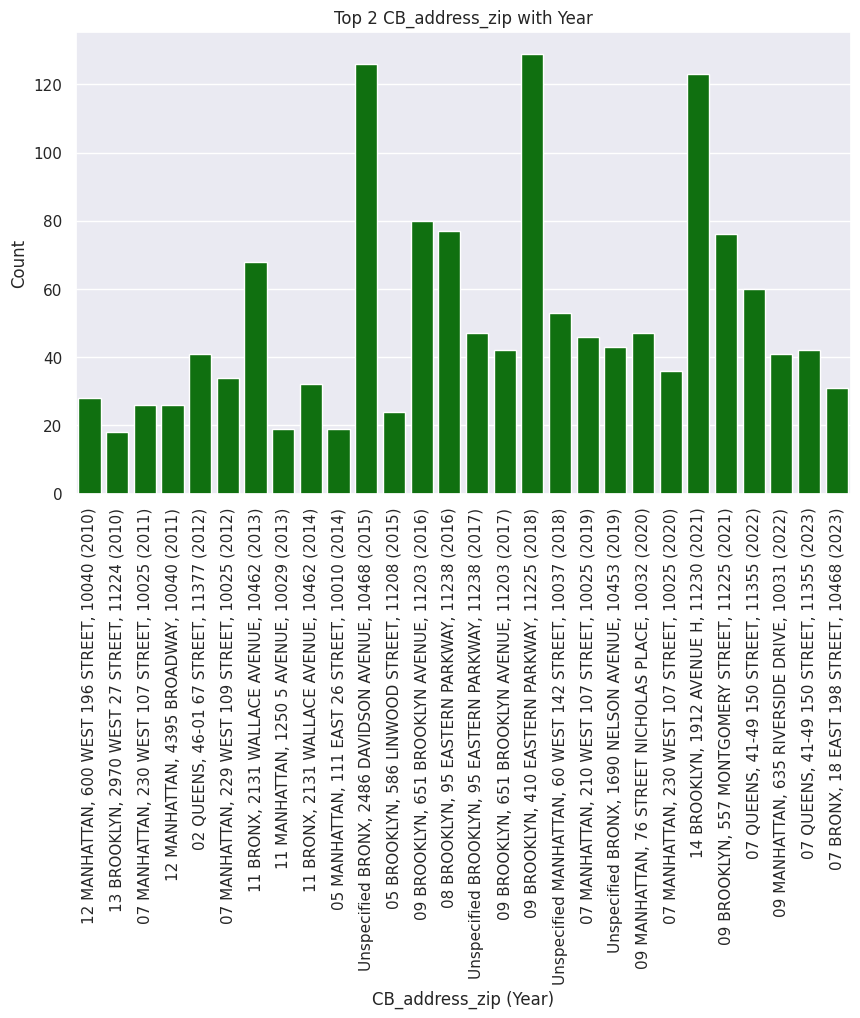

In [575]:
# Group the data by 'year' and 'CB_address_zip' and get the count
CB_year_counts = rat1.groupby(['year', 'CB_address_zip']).size().reset_index(name='count')

# Select the top addresses with the highest counts
top_addresses = CB_year_counts.groupby('year').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)

# Combine 'CB_address_zip' and 'year' into a new column
top_addresses['label'] = top_addresses['CB_address_zip'] + ' (' + top_addresses['year'].astype(str) + ')'

# Plot the counts of the top addresses with green color bars
plt.figure(figsize=(10, 6))
sns.barplot(data=top_addresses, x='label', y='count', color='green')
plt.xlabel('CB_address_zip (Year)')
plt.ylabel('Count')
plt.title('Top 2 CB_address_zip with Year')
plt.xticks(rotation=90)
plt.show()

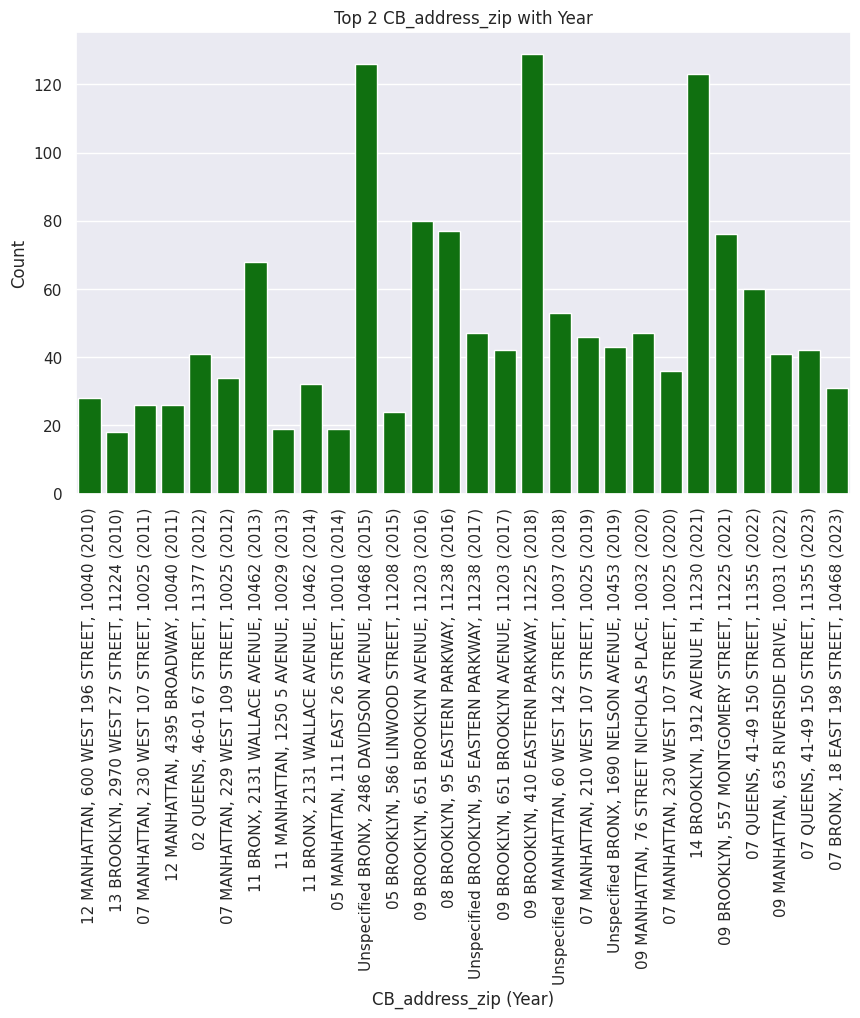

In [576]:
# Group the data by 'year' and 'CB_address_zip' and get the count
CB_year_counts = rat1.groupby(['year', 'CB_address_zip']).size().reset_index(name='count')

# Select the top addresses with the highest counts
top_addresses = CB_year_counts.groupby('year').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)

# Combine 'CB_address_zip' and 'year' into a new column
top_addresses['label'] = top_addresses['CB_address_zip'] + ' (' + top_addresses['year'].astype(str) + ')'

# Plot the counts of the top addresses with green color bars
plt.figure(figsize=(10, 6))
sns.barplot(data=top_addresses, x='label', y='count', color='green')
plt.xlabel('CB_address_zip (Year)')
plt.ylabel('Count')
plt.title('Top 2 CB_address_zip with Year')
plt.xticks(rotation=90)
plt.show()

#####Attempt this on the sets... or limit by year and community board?

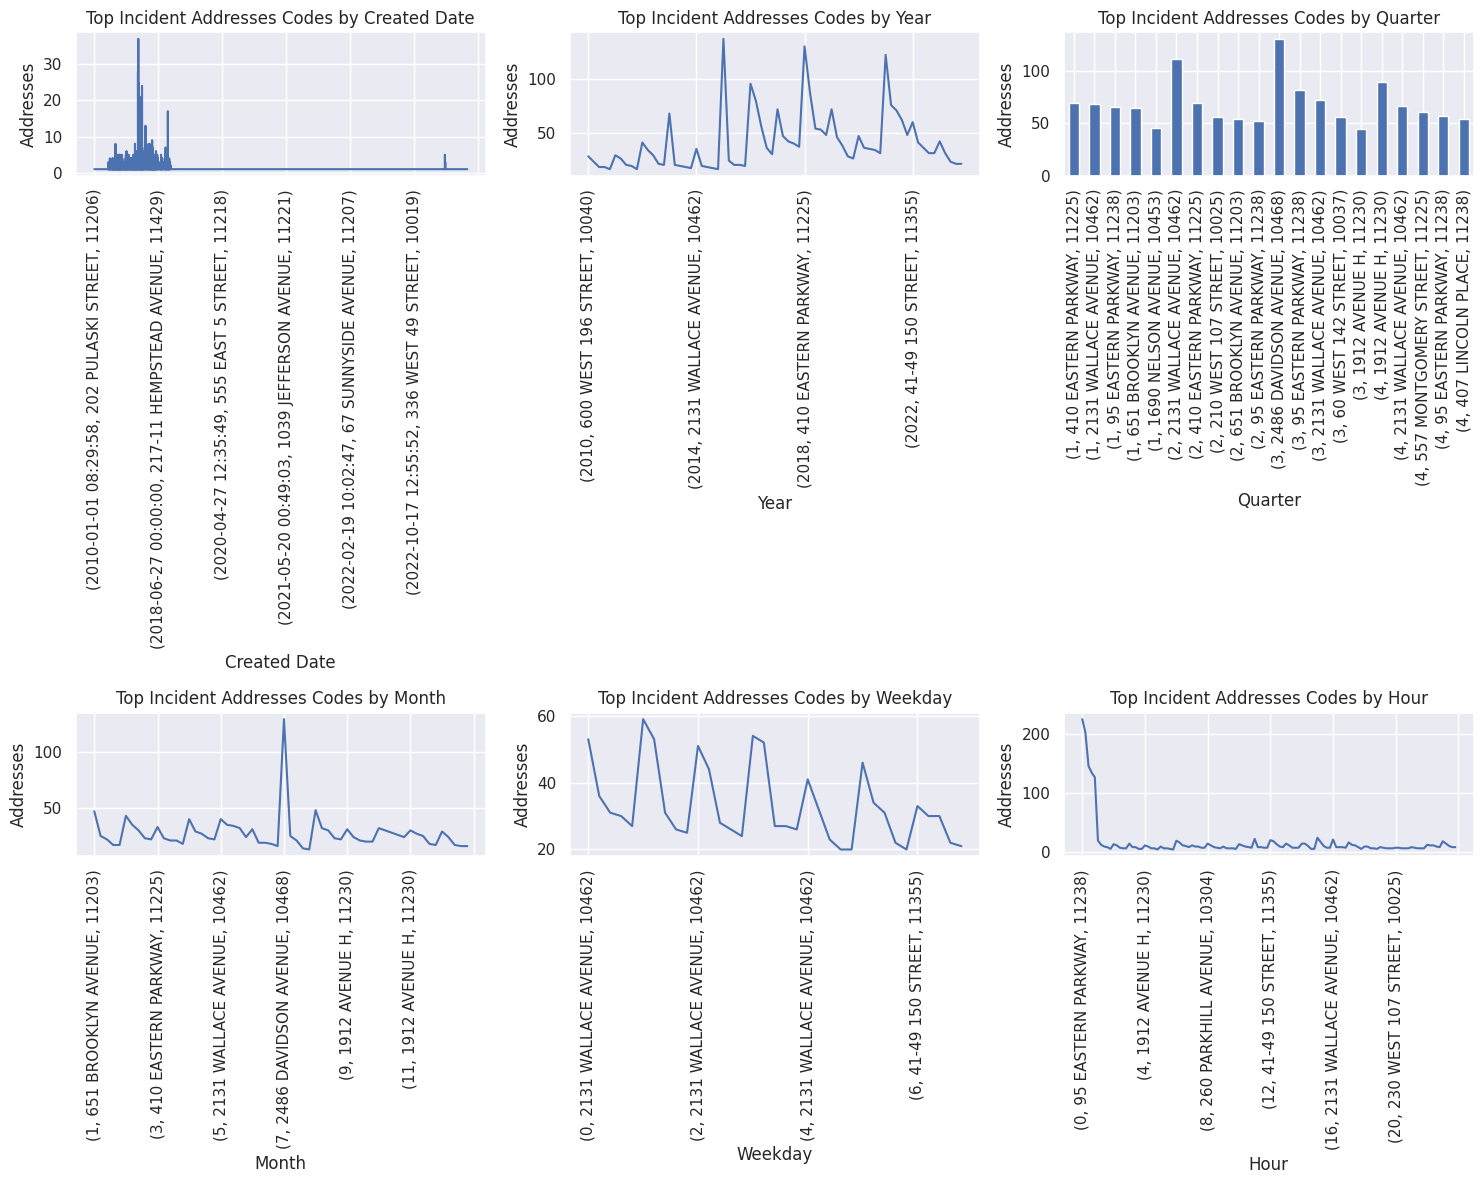

In [577]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Plot the top_addresses_by_created_date
plt.subplot(2, 3, 1)
top_addresses_by_created_date.plot(kind='line')
plt.xlabel('Created Date')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Created Date')
plt.xticks(rotation=90)
# Plot the top_addresses_by_year
plt.subplot(2, 3, 2)
top_addresses_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Year')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by quarter
plt.subplot(2, 3, 3)
top_addresses_by_quarter.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Quarter')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by month
plt.subplot(2, 3, 4)
top_addresses_by_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Month')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by weekday
plt.subplot(2, 3, 5)
top_addresses_by_weekday.plot(kind='line')
plt.xlabel('Weekday')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Weekday')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by hour
plt.subplot(2, 3, 6)
top_addresses_by_hour.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Hour')
plt.xticks(rotation=90)


# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

In [578]:
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(data=rat1, x='longitude', y='latitude', hue='community_board', alpha=0.15, palette="viridis", label='Rat Sightings\n Community Districts', ax=ax)
# sns.scatterplot(data=dsny1, x='Longitude', y='Latitude', hue= 'district', palette="Blues" ,label='\nDSNY Districts', ax=ax)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2)
# ax.set_title('Rat Sightings by Community Districts/DSNY Districts 2010-6/2023')
# plt.show()

#**series count weekday**
Monday = 0

Tuesday = 1

Wednesday = 2, and so on

#RAT1: NEW df with no no nulls/ for value counts to scale and analyse/

In [579]:
# Create a new DataFrame for rat1 analysis
rat1_analysis = rat1.copy()

In [580]:
rat1_analysis['frequency_cb'] = rat1_analysis['address_zip'].map(rat1_analysis['address_zip'].value_counts()).fillna(0)
print(rat1_analysis.frequency_cb.unique())

[  1   2   3   4   5   9  33  19  12  31   6  13   7  15   8  21 177  60
  29  16  38  10 150  39  23  11  41  14 256  59  28  50  22  17  24  30
  35  20  75  36  45  83  61  25  32  44  34  40  77  76  43 120  81  26
  53  18  49  80 317  42  47  84 117  57  46  27  98  73 110  37  89  67
 114  56  99  54  78 137  65  85  51  52 138]


#rat1_analysis DF without outliers  for ml

In [581]:
Q1 = rat1_analysis['frequency_cb'].quantile(0.25)
Q3 = rat1_analysis['frequency_cb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rat1_analysis[(rat1_analysis['frequency_cb'] < lower_bound) | (rat1_analysis['frequency_cb'] > upper_bound)]

In [582]:
rat1_analysis = rat1_analysis[~((rat1_analysis['frequency_cb'] < lower_bound) | (rat1_analysis['frequency_cb'] > upper_bound))]

In [583]:
rat1_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188681 entries, 173104 to 184248
Data columns (total 46 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   unique_key                  188681 non-null  int64         
 1   created_date                188681 non-null  datetime64[ns]
 2   due_date                    108859 non-null  object        
 3   closed_date                 174125 non-null  datetime64[ns]
 4   location_type               188671 non-null  object        
 5   borough                     188679 non-null  object        
 6   incident_zip                188681 non-null  int64         
 7   community_board             188679 non-null  object        
 8   city                        186063 non-null  object        
 9   incident_address            188681 non-null  object        
 10  street_name                 188680 non-null  object        
 11  cross_street _1             172745

In [584]:
# sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [585]:
missing_counts =   rat1_analysis.isnull().sum().sort_values(ascending = False)
percent = ( rat1_analysis.isnull().sum()*100/  rat1_analysis.shape[0]).sort_values(ascending = False)

In [586]:
missing_rat1 = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat1}')

 Missing values: 
                            Counts          %
landmark                    114243  60.548227
intersection_street_1       105996  56.177358
intersection_street_2       105959  56.157748
due_date                     79822  42.305267
cross_street _1              15936   8.446001
cross_street_2               15932   8.443881
close_date                   14556   7.714608
closed_date                  14556   7.714608
address_Type                  4086   2.165560
city                          2618   1.387527
Y Coordinate (State Plane)    1318   0.698534
location                      1318   0.698534
longitude                     1318   0.698534
latitude                      1318   0.698534
X Coordinate (State Plane)    1318   0.698534
sightings_per_capita          1007   0.533705
zcta                          1007   0.533705
label                         1007   0.533705
modztca                       1007   0.533705
pop_est                       1007   0.533705
the_geom        

In [587]:
rat1_analysis.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom',
       'year', 'quarter', 'month', 'weekday', 'day', 'hour', 'incident_zips',
       'address_zip', 'CB_address_zip', 'CB_counts', 'sightings_per_capita',
       'CB_sightings_per_capita', 'create_date', 'close_date', 'duration',
       'sightings_count', 'frequency_cb'],
      dtype='object')

In [588]:
# Drop the specified columns
columns_to_drop = ['incident_address','incident_zip', 'incident_zips','cross_street _1', 'cross_street_2','closed_date','due_date', 'intersection_street_1', 'intersection_street_2', 'address_Type', 'landmark', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location','table_count', 'modztca', 'label', 'zcta', 'pop_est', 'create_date', 'close_date', 'frequency_cb']
rat1_analysis = rat1_analysis.drop(columns_to_drop, axis=1).reset_index(drop=True)

In [589]:
# Reset the index and sort by 'unique_key' and 'created_date' in ascending order
rat1_analysis_sorted = rat1_analysis.sort_values(by=['created_date','unique_key'], ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(rat1_analysis_sorted)

        unique_key        created_date            location_type    borough  \
0         15633803 2010-01-01 08:29:58  3+ Family Apt. Building   BROOKLYN   
1         15633054 2010-01-01 11:20:45      1-2 Family Dwelling     QUEENS   
2         15633896 2010-01-01 12:11:51  3+ Family Apt. Building  MANHATTAN   
3         15633897 2010-01-01 12:12:04  3+ Family Apt. Building      BRONX   
4         15633828 2010-01-01 14:15:27          Vacant Building   BROOKLYN   
...            ...                 ...                      ...        ...   
188676    58072108 2023-07-02 23:04:44        Construction Site   BROOKLYN   
188677    58077231 2023-07-02 23:27:12  3+ Family Apt. Building     QUEENS   
188678    58078235 2023-07-03 00:19:54  3+ Family Apt. Building  MANHATTAN   
188679    58075206 2023-07-03 01:08:50    Other (Explain Below)  MANHATTAN   
188680    58072023 2023-07-03 02:05:32    Other (Explain Below)  MANHATTAN   

              community_board           city          street_na

In [590]:
rat1_analysis = rat1_analysis_sorted.reset_index(drop=True)

In [591]:
missing_counts_ck =   rat1_analysis.isnull().sum().sort_values(ascending = False)
percent_ck = ( rat1_analysis.isnull().sum()*100/  rat1_analysis.shape[0]).sort_values(ascending = False)

In [592]:
missing_rat = pd.concat([missing_counts_ck, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat}')

 Missing values: 
                            Counts          %
city                        2618.0   1.387527
the_geom                    1007.0   0.533705
sightings_per_capita        1007.0   0.533705
location_type                 10.0   0.005300
borough                        2.0   0.001060
community_board                2.0   0.001060
CB_counts                      2.0   0.001060
CB_address_zip                 2.0   0.001060
street_name                    1.0   0.000530
unique_key                     0.0   0.000000
hour                           0.0   0.000000
duration                       0.0   0.000000
CB_sightings_per_capita        0.0   0.000000
address_zip                    0.0   0.000000
month                          0.0   0.000000
day                            0.0   0.000000
weekday                        0.0   0.000000
created_date                   0.0   0.000000
quarter                        0.0   0.000000
year                           0.0   0.000000
status          

In [593]:
rat1_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188681 entries, 0 to 188680
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   unique_key               188681 non-null  int64         
 1   created_date             188681 non-null  datetime64[ns]
 2   location_type            188671 non-null  object        
 3   borough                  188679 non-null  object        
 4   community_board          188679 non-null  object        
 5   city                     186063 non-null  object        
 6   street_name              188680 non-null  object        
 7   status                   188681 non-null  object        
 8   the_geom                 187674 non-null  object        
 9   year                     188681 non-null  int64         
 10  quarter                  188681 non-null  int64         
 11  month                    188681 non-null  int64         
 12  weekday         

In [594]:
# sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [595]:
rat1_analysis['city'] = rat1_analysis['city'].fillna('UNSPECIFIED')

In [596]:
rat1_analysis.columns

Index(['unique_key', 'created_date', 'location_type', 'borough',
       'community_board', 'city', 'street_name', 'status', 'the_geom', 'year',
       'quarter', 'month', 'weekday', 'day', 'hour', 'address_zip',
       'CB_address_zip', 'CB_counts', 'sightings_per_capita',
       'CB_sightings_per_capita', 'duration', 'sightings_count'],
      dtype='object')

#Top value counts by address zip :  Rat2_analysis

In [621]:
top_counts = rat2_analysis.groupby('address_zip').agg({
    'unique_key':'count',
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
})

top_counts_df = top_counts.reset_index().sort_values(['sightings_per_capita', 'unique_key'], ascending=[False, False])

# Filter the DataFrame based on the 'unique_key' column
top_counts_df = top_counts_df[top_counts_df['unique_key'] == 16]

print(top_counts_df)

                      address_zip  unique_key  sightings_per_capita  \
65057   45 WEST 132 STREET, 10037          16              0.000047   
30784  200 WEST 148 STREET, 10039          16              0.000036   
42699        2588 7 AVENUE, 10039          16              0.000036   
1134   101 WEST 143 STREET, 10030          16              0.000033   
5735   111 WEST 141 STREET, 10030          16              0.000033   
...                           ...         ...                   ...   
88059  83 EAST 18TH STREET, 11226          16              0.000010   
93406  95 LINDEN BOULEVARD, 11226          16              0.000010   
23831      17 DEVOE STREET, 11211          16              0.000010   
83602   728 LORIMER STREET, 11211          16              0.000010   
56072  3530 DECATUR AVENUE, 10467          16              0.000010   

                      location_type  \
65057       3+ Family Apt. Building   
30784       3+ Family Apt. Building   
42699  3+ Family Mixed Use Bui

In [628]:
sightings_per_count = rat2_analysis.groupby('address_zip').agg({
    'unique_key':'count',
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
}).nlargest(100, 'unique_key', keep='first')

top_100_per_count_df = top_100_per_count.reset_index().sort_values('sightings_per_capita', ascending=False)
print(top_100_per_count_df)

                   address_zip  unique_key  sightings_per_capita  \
68   45 WEST 132 STREET, 10037          16              0.000047   
42        2588 7 AVENUE, 10039          16              0.000036   
27  200 WEST 148 STREET, 10039          16              0.000036   
0   101 WEST 143 STREET, 10030          16              0.000033   
2   111 WEST 141 STREET, 10030          16              0.000033   
..                         ...         ...                   ...   
4        125 LENOX ROAD, 11226          16              0.000010   
97  95 LINDEN BOULEVARD, 11226          16              0.000010   
85   728 LORIMER STREET, 11211          16              0.000010   
18      17 DEVOE STREET, 11211          16              0.000010   
59  3530 DECATUR AVENUE, 10467          16              0.000010   

                   location_type  \
68       3+ Family Apt. Building   
42  3+ Family Mixed Use Building   
27       3+ Family Apt. Building   
0        3+ Family Apt. Building   
2  

In [648]:
count_16_df = top_100_per_count_df[top_100_per_count_df['unique_key'] == 16]
unique_address_zips = count_16_df['address_zip'].unique()
print(unique_address_zips)

['45 WEST 132 STREET, 10037' '2588 7 AVENUE, 10039'
 '200 WEST 148 STREET, 10039' '101 WEST 143 STREET, 10030'
 '111 WEST 141 STREET, 10030' '202 EAST 21 STREET, 10010'
 '149 EAST 118 STREET, 10035' '2 EAST 125 STREET, 10035'
 '151 MCGUINNESS BOULEVARD, 11222' '20-54 45 STREET, 11105'
 '444 EAST 136 STREET, 10454' '386 EAST 139 STREET, 10454'
 '321 WEST 116 STREET, 10026' '143 WEST 111 STREET, 10026'
 '66 WEST 119 STREET, 10026' '86-34 WOODHAVEN BOULEVARD, 11421'
 '270 NAGLE AVENUE, 10034' '541 WEST 204TH STREET, 10034'
 '145 WEST 55 STREET, 10019' '34 HILLSIDE AVENUE, 10040'
 '320 EAST 85 STREET, 10028' '1584 2 AVENUE, 10028'
 '222 EAST 81 STREET, 10028' '444 EAST 82 STREET, 10028'
 '941 INTERVALE AVENUE, 10459' '338 STARR STREET, 11237'
 '296 HARMAN STREET, 11237' '30 IRVING AVENUE, 11237'
 '347 LINCOLN PLACE, 11238' '73 EASTERN PARKWAY, 11238'
 '127 LEFFERTS PLACE, 11238' '36 BREVOORT PLACE, 11216'
 '792 STERLING PLACE, 11216' '371 EASTERN PARKWAY, 11216'
 '251 CLIFTON PLACE, 11216'

In [649]:
sightings_per_capita = rat2_analysis.groupby('address_zip').agg({
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
})

sightings_per_capita['unique_key_count'] = rat2_analysis.groupby('address_zip')['unique_key'].count()
sightings_per_capita_df = sightings_per_capita.reset_index().sort_values('sightings_per_capita', ascending=False)
print(sightings_per_capita_df)

                         address_zip  sightings_per_capita  \
2314         104 BROAD STREET, 10004               0.00033   
56641         36 WATER STREET, 10004               0.00033   
72427         55 BROAD STREET, 10004               0.00033   
149          1 NEW YORK PLAZA, 10004               0.00033   
81822         70 BROAD STREET, 10004               0.00033   
...                              ...                   ...   
97416        WALLABOUT STREET, 11249                   NaN   
97667                 WEST DRIVE, 83                   NaN   
97694  WILLIAMBRG STREET EAST, 11249                   NaN   
97697     WILLIAMSBURG BRIDGE, 11249                   NaN   
97731            WYTHE AVENUE, 11249                   NaN   

                      location_type  \
2314            Commercial Building   
56641  3+ Family Mixed Use Building   
72427           Commercial Building   
149             Commercial Building   
81822           Commercial Building   
...                  

In [636]:
top_100_per_capita_df.unique_key_count.unique()

array([ 1,  8,  7,  2,  4, 14, 11,  3,  6, 15, 10,  5, 12,  9, 13, 16])

this needs fixed

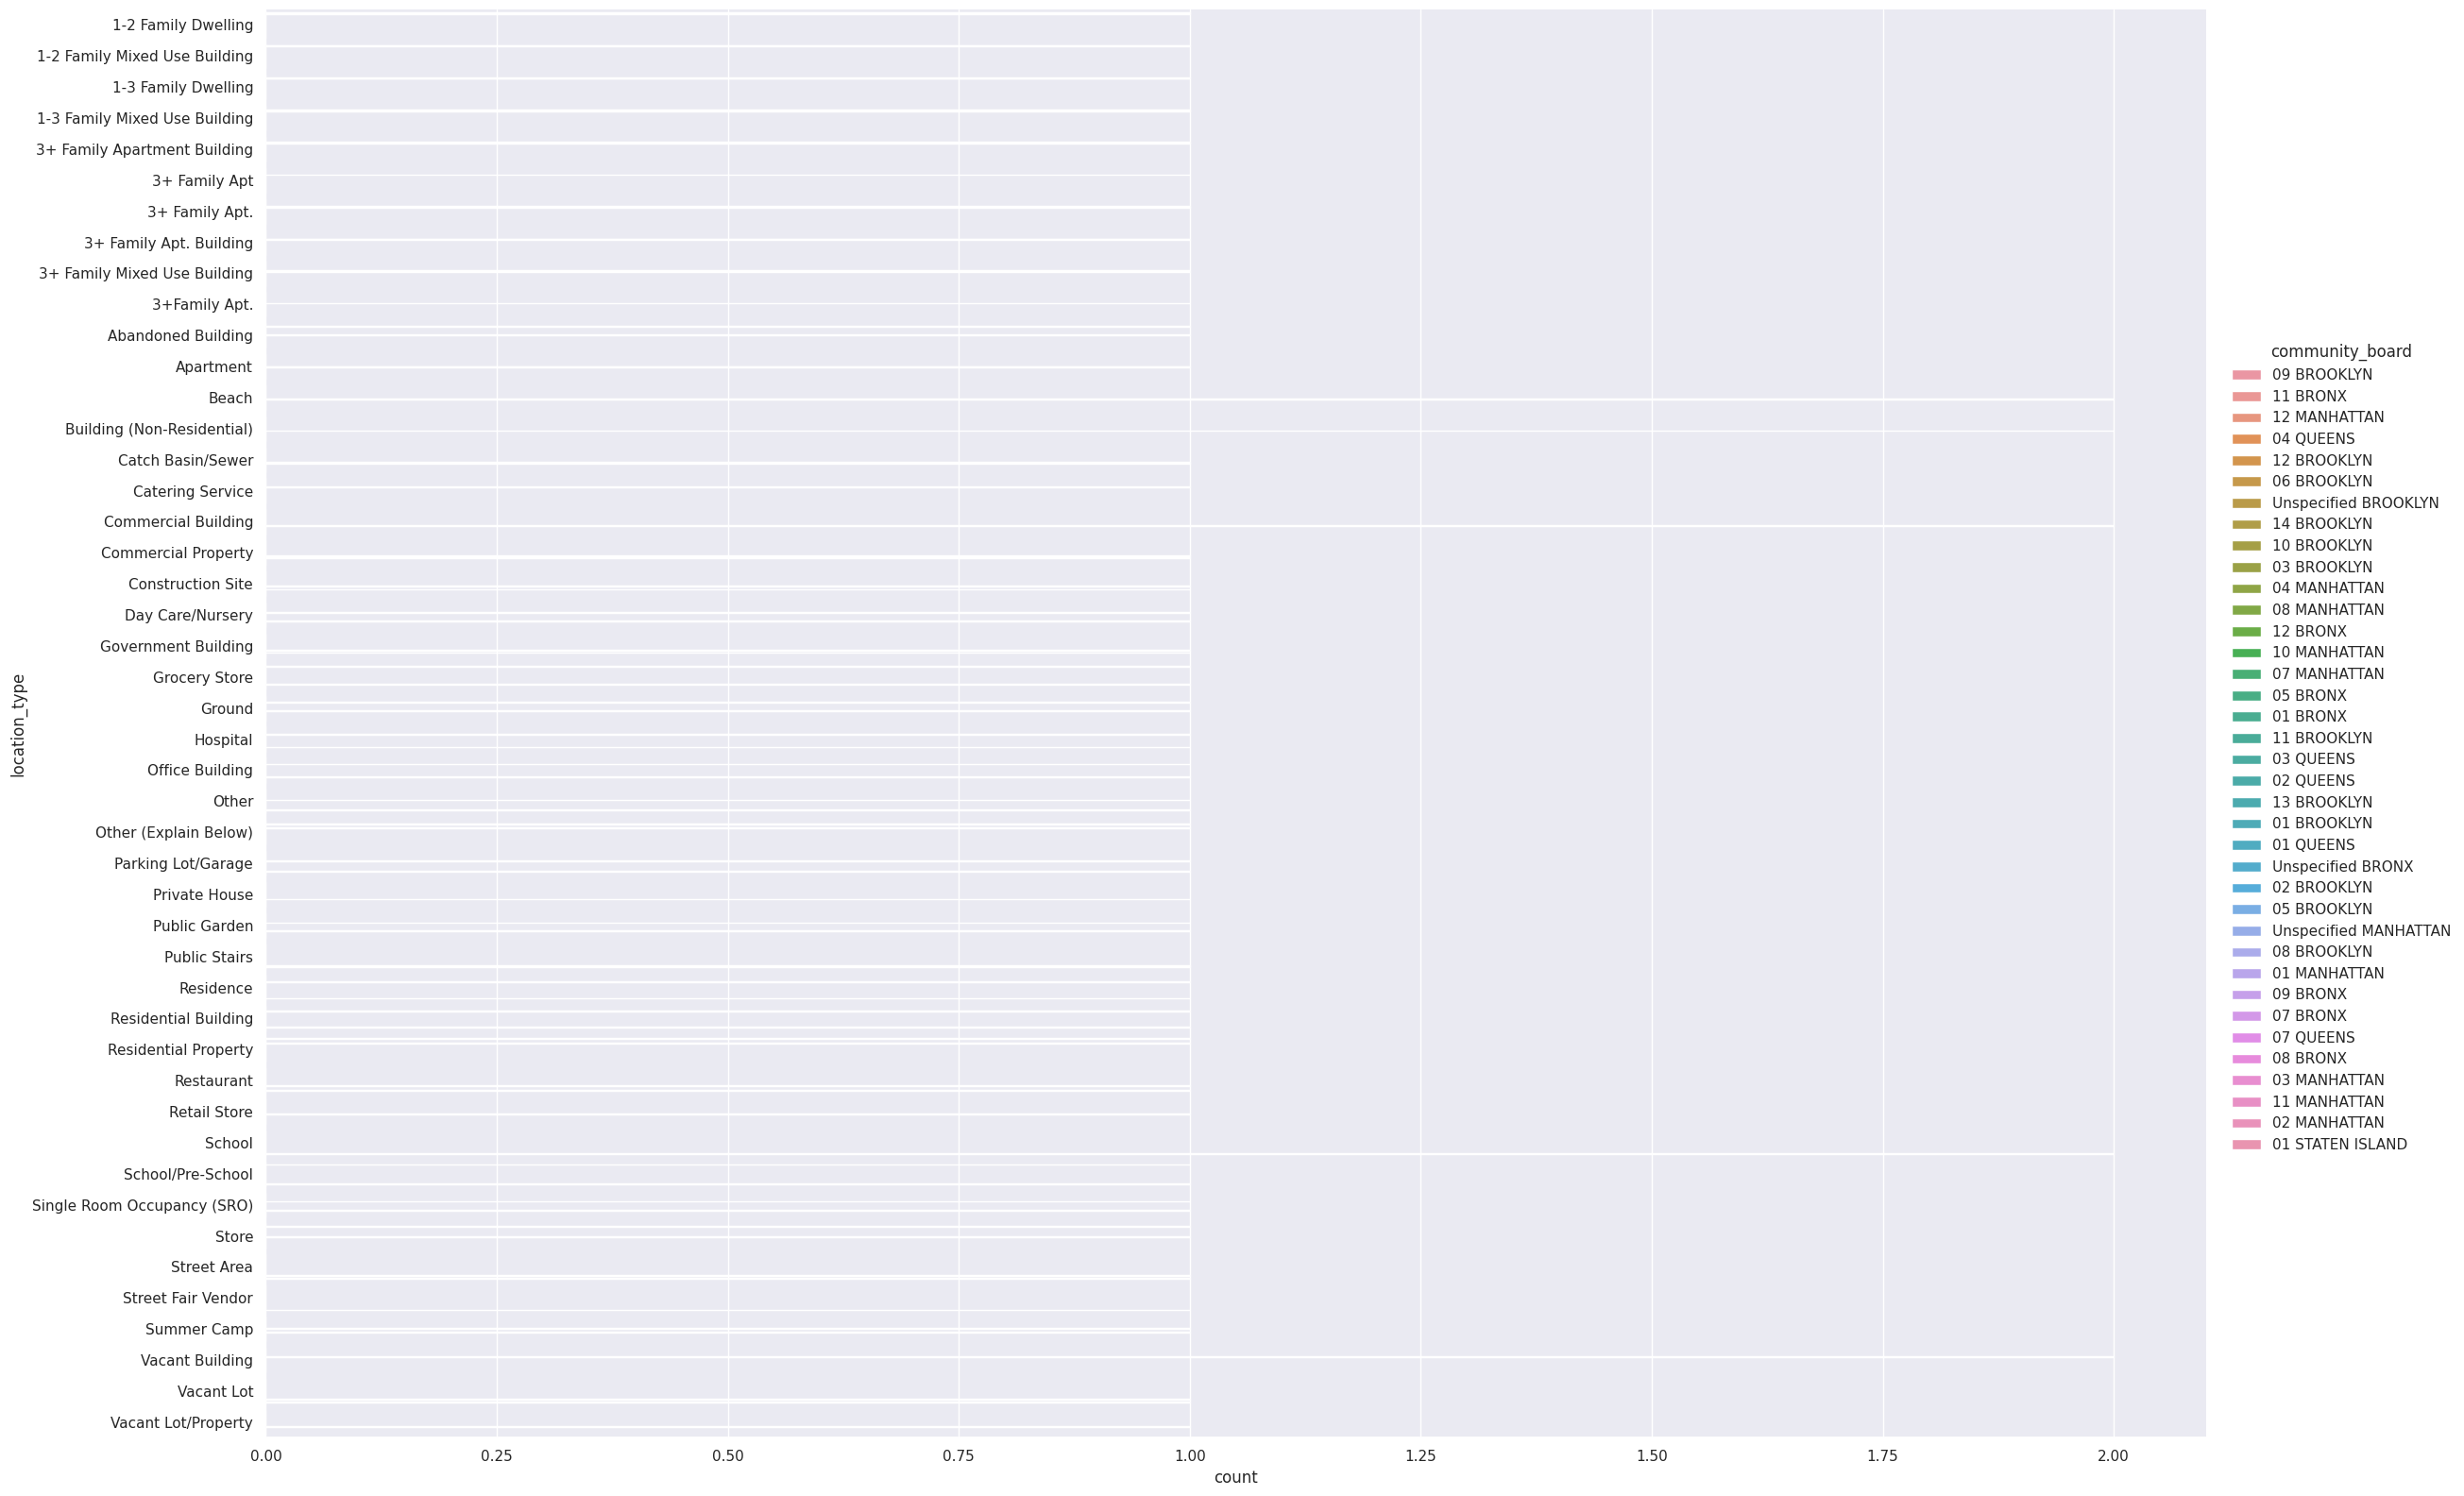

In [650]:
#top 10 per category of location type
top_2_per_category = (
    top_100_per_capita_df.groupby('location_type')
    .apply(lambda x: x.nlargest(2, 'unique_key_count'))
    .reset_index(drop=True)
)

# Plot the filtered data
sns.catplot(y='location_type', hue='community_board', data=top_2_per_category, kind='count', height=16, aspect=1.5)

In [638]:
# sns.barplot(x='address_zip', y='sightings_per_capita', hue='community_board', data=top_100_address_counts_df)
# plt.xlabel('address_zip')
# plt.ylabel('sightings_per_capita')
# plt.title('Comparison of Counts')
# plt.xticks(rotation=90)
# plt.show()

KeyboardInterrupt: ignored

#StandardScalor

In [ ]:
top_address_scale = top_address_counts.copy()

# Select numeric columns for scaling
numeric_columns = top_address_scale.select_dtypes(include=['int', 'float']).columns

# Scale the numeric columns
scaler = StandardScaler()
top_address_scale[numeric_columns] = scaler.fit_transform(top_address_scale[numeric_columns])

print(top_address_scale)

In [ ]:
sns.pairplot(CB_address_zip)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = top_address_scale.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize': 10})
plt.title('Correlation Matrix')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#MinMaxScaler

In [ ]:
top_address_counts.isnull().sum()

In [ ]:
top_address_scale2 = top_address_counts.copy()
top_address_scale2 = top_address_scale2.fillna(top_address_scale2.mean())

# Define data
data = top_address_scale2

# Define min-max scaler
scaler2 = MinMaxScaler()

# Transform data
scaled_top_address2 = scaler2.fit_transform(data)

print(scaled_top_address2)

In [ ]:
# Compute the correlation matrix
minmax_correlation_matrix = np.corrcoef(scaled_top_address2, rowvar=False)

print(minmax_correlation_matrix)

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(minmax_correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize': 10})

plt.title('Min Max - Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

because it looks pretty

#rat2_analysis DF includes outliers

In [620]:
rat2_analysis = rat1_analysis_sorted.copy()

# Exports

In [ ]:
# Export Selected Columns to CSV File
#column_names = ['', '','']
#df.to_csv("c:/tmp/courses.csv",index=False, columns=column_names)

# Writes Content to CSV File

###Print to file

In [ ]:
df_top_addresses.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/df_top_addresses.csv")

In [ ]:
#rat1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1.csv")
# dsny1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/dsny1.csv")
rat1_analysis.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1_analysis.csv")

In [ ]:

# output_file_path1 = os.path.join(output_directory, 'top_25_address_counts.csv')
# output_file_path2 = os.path.join(output_directory, 'top_address_counts.csv')
# output_file_path3 = os.path.join(output_directory, 'top_address_scale.csv')

# top_address_scale.to_csv(output_file_path3, index=False, mode='w')
# top_25_address_counts.to_csv(output_file_path1, index=False, mode='w')
# top_address_counts.to_csv(output_file_path2, index=False, mode='w')